# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib import style
#style.use('dark_background')
%matplotlib inline

## Setting Style / Palette

In [2]:
sns.set_palette('Set2')
sns.set_style('white')
sns.set_context('paper', font_scale=1.25)

## Getting RGB Values for Paired Palette

In [3]:
color_list = sns.color_palette('Paired',8)
paired = color_list.as_hex()[:]
print(color_list)
print(paired)
color_list

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), (0.2, 0.6274509803921569, 0.17254901960784313), (0.984313725490196, 0.6039215686274509, 0.6), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883), (1.0, 0.4980392156862745, 0.0)]
['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0)]

## Load Data

In [4]:
df = pd.read_csv('faps_clean.csv', index_col = 0)
df.head()

,hhnum,adltfscat,binadltfscat,fincondition,region,rural,rrindicator,targetgroup,inchhavg_r,snapnowhh,...,prop_black,prop_other,prop_narace,educcat,pr_educcat,ncimmigrant_any,ncimmigrant_every,nchildren,nadults,disabled
0,100012,2,0,4,3,1,31,4,4667.33,1,...,0.0,0.0,0.0,1,2,0,0,2,3,0
1,100015,2,0,3,3,0,30,2,1200.00,0,...,1.0,0.0,0.0,2,2,0,0,0,1,0
2,100024,2,0,3,2,0,20,3,5024.50,0,...,0.0,0.0,0.0,1,1,0,0,1,1,0
3,100026,3,1,3,3,1,31,2,1800.00,0,...,0.0,0.0,0.0,3,3,0,0,0,2,0
4,100028,4,1,4,1,0,10,4,3998.00,1,...,0.0,0.0,0.0,3,3,0,0,2,4,1


## ADLTFSCAT - Food Security Status

Figure 1

[Text(0, 0, '2512'), Text(0, 0, '958'), Text(0, 0, '779'), Text(0, 0, '559')]

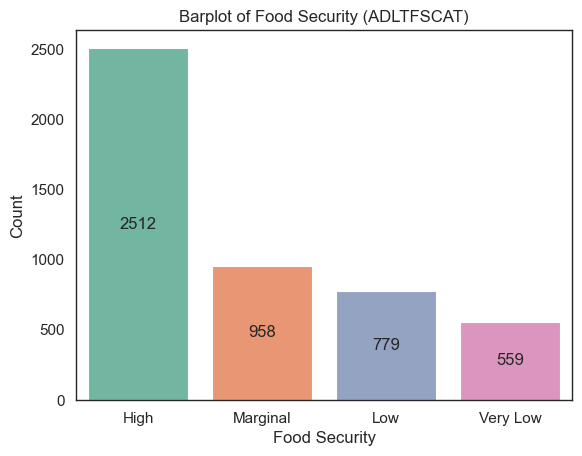

In [5]:
ax = sns.countplot(data = df, x = 'adltfscat')
plt.xlabel('Food Security')
plt.ylabel('Count')
plt.title('Barplot of Food Security (ADLTFSCAT)')

# Changing tick labels on x axis
default_ticks = range(df['adltfscat'].nunique())
plt.xticks(default_ticks,['High','Marginal','Low','Very Low'])

# Inputting counts in bars
ax.bar_label(ax.containers[0], label_type='center')

## BINADLTFSCAT - Binary Food Insecurity

Figure 2

[Text(0, 0, '3470'), Text(0, 0, '1338')]

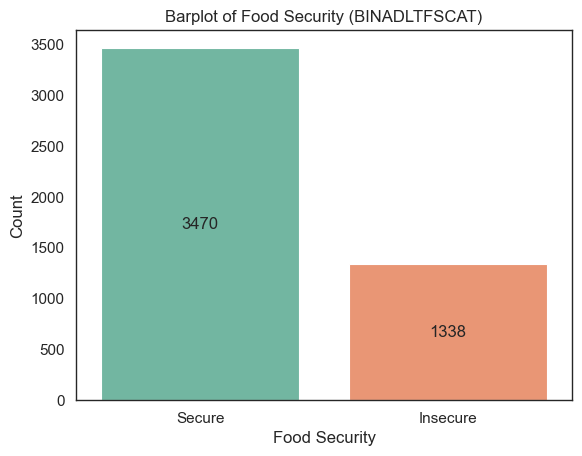

In [6]:
ax = sns.countplot(data = df, x = 'binadltfscat')
plt.xlabel('Food Security')
plt.ylabel('Count')
plt.title('Barplot of Food Security (BINADLTFSCAT)')

default_ticks = range(df['binadltfscat'].nunique())
plt.xticks(default_ticks,['Secure','Insecure'])

ax.bar_label(ax.containers[0], label_type='center')

## SNAPNOWHH - Receiving SNAP Benefits

Figure 3, Figure 4 combined

[Text(0, 0, '628'), Text(0, 0, '710')]

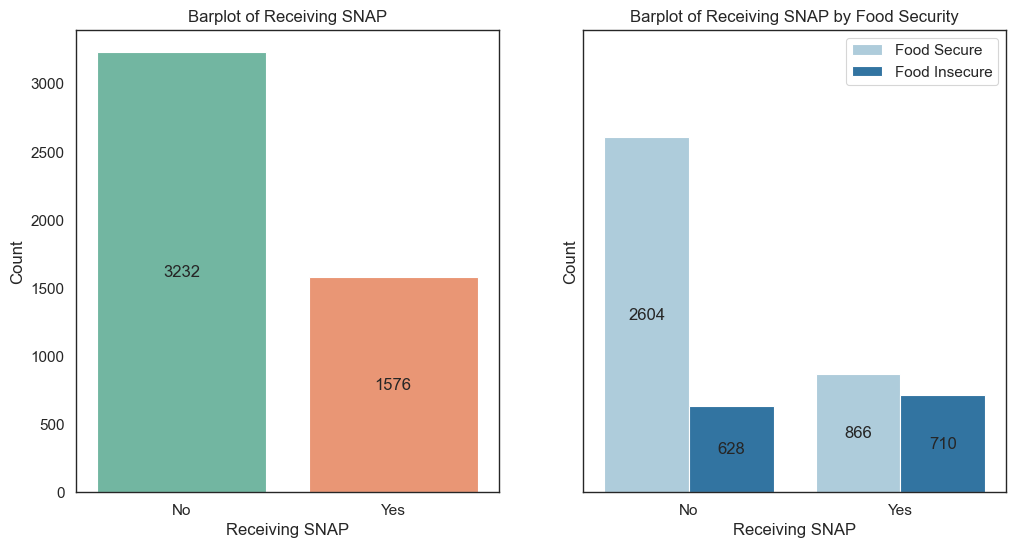

In [7]:
fig, axs = plt.subplots(ncols = 2, figsize = (12,6), sharey = 'row')
sns.countplot(data = df, x = 'snapnowhh', ax = axs[0])
sns.countplot(data = df, x = 'snapnowhh', hue = 'binadltfscat', palette = 'Paired', ax = axs[1])

axs[0].set(xlabel = 'Receiving SNAP', ylabel = 'Count', title = 'Barplot of Receiving SNAP')
axs[1].set(xlabel = 'Receiving SNAP', ylabel = 'Count', title = 'Barplot of Receiving SNAP by Food Security')
axs[1].legend(['Food Secure','Food Insecure'])

# Changing tick labels on x axis
plt.setp(axs, xticks = [0,1], xticklabels = ['No','Yes'])

# Inputting counts in bars
axs[0].bar_label(axs[0].containers[0], label_type='center')
axs[1].bar_label(axs[1].containers[0], label_type='center')
axs[1].bar_label(axs[1].containers[1], label_type='center')

Figure 3

[Text(0, 0, '3232'), Text(0, 0, '1576')]

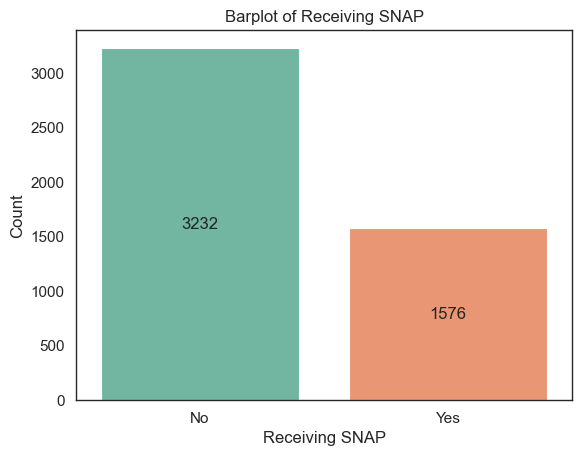

In [8]:
ax = sns.countplot(data = df, x = 'snapnowhh')

plt.xlabel('Receiving SNAP')
plt.ylabel('Count')
plt.title('Barplot of Receiving SNAP')
default_ticks = range(df['snapnowhh'].nunique())
plt.xticks(default_ticks,['No','Yes'])
ax.bar_label(ax.containers[0], label_type='center')

Figure 4

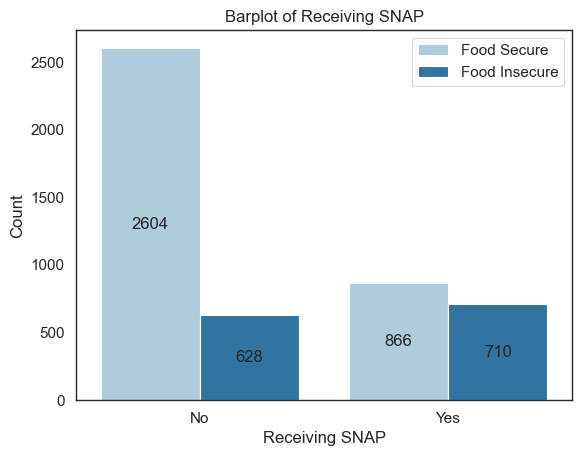

In [9]:
ax = sns.countplot(data = df, x = 'snapnowhh', hue = 'binadltfscat', palette = 'Paired')

plt.xlabel('Receiving SNAP')
plt.ylabel('Count')
plt.title('Barplot of Receiving SNAP')
default_ticks = range(df['snapnowhh'].nunique())
plt.xticks(default_ticks,['No','Yes'])
ax.bar_label(ax.containers[0], label_type='center')
ax.bar_label(ax.containers[1], label_type='center')
ax.legend(['Food Secure','Food Insecure'])

## REGION

Figure 6

[Text(0, 0, '812'), Text(0, 0, '1168'), Text(0, 0, '1777'), Text(0, 0, '1051')]

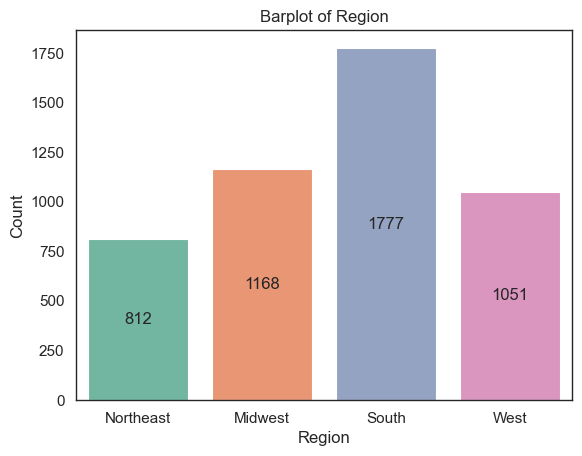

In [10]:
ax = sns.countplot(data = df, x = 'region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Barplot of Region')
plt.setp(ax, xticks = [0,1,2,3], xticklabels = ['Northeast','Midwest','South','West'])
ax.bar_label(ax.containers[0], label_type='center')

Figure 7 and Figure 8 Combined

C:\Users\samuel.thomas\AppData\Local\Temp\ipykernel_11388\343835430.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt.gca(ax = axs[1]).invert_yaxis()


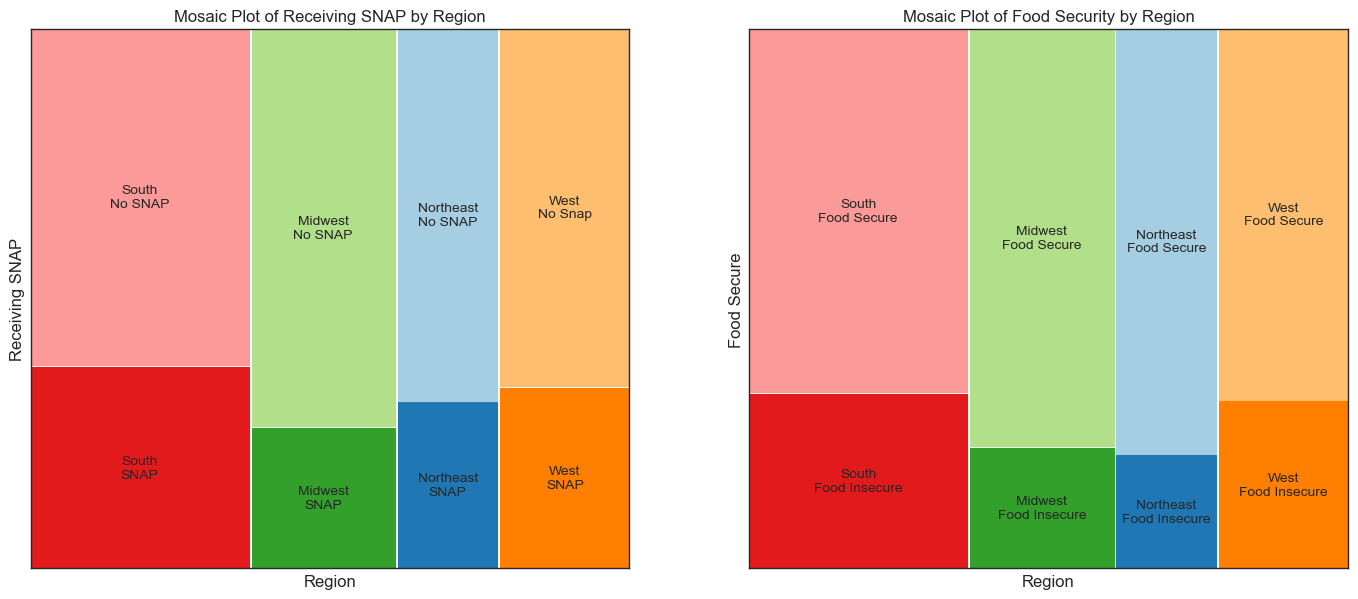

In [11]:
fig, axs = plt.subplots(ncols = 2, figsize = (17,7))

# Setting colors for plots
cols = {('1','0'):paired[0],('1','1'):paired[1],('2','0'):paired[2],('2','1'):paired[3],
            ('3','0'):paired[4],('3','1'):paired[5],('4','0'):paired[6],('4','1'):paired[7]}

# Setting Labels for SNAP plot
labels_SNAP = lambda k:{('1','0'):'Northeast\nNo SNAP',('1','1'):'Northeast\nSNAP',('2','0'):'Midwest\nNo SNAP',('2','1'):'Midwest\nSNAP',
            ('3','0'):'South\nNo SNAP',('3','1'):'South\nSNAP',('4','0'):'West\nNo Snap',('4','1'):'West\nSNAP'}[k]

mosaic(data=df, index=['region', 'snapnowhh'], ax=axs[0], 
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels_SNAP, axes_label=False)
axs[0].set(xlabel = 'Region', ylabel = 'Receiving SNAP', title = 'Mosaic Plot of Receiving SNAP by Region')

# Setting Labels for Food Insecurity plot
labels_SEC = lambda k:{('1','0'):'Northeast\nFood Secure',('1','1'):'Northeast\nFood Insecure',('2','0'):'Midwest\nFood Secure',('2','1'):'Midwest\nFood Insecure',
            ('3','0'):'South\nFood Secure',('3','1'):'South\nFood Insecure',('4','0'):'West\nFood Secure',('4','1'):'West\nFood Insecure'}[k]

mosaic(data=df, index = ['region', 'binadltfscat'], ax = axs[1], 
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels_SEC, axes_label=False)
axs[1].set(xlabel = 'Region', ylabel = 'Food Secure', title = 'Mosaic Plot of Food Security by Region')

# Flipping Food Insecurity Plot
plt.gca(ax = axs[1]).invert_yaxis()

plt.show()

Figure 7

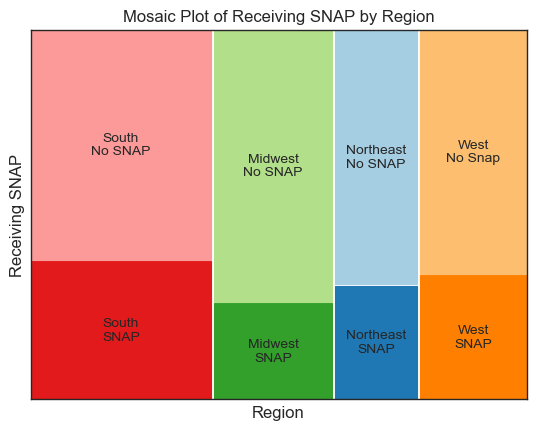

In [12]:
fig, axs = plt.subplots(ncols = 1)

# Setting colors for plot
cols = {('1','0'):paired[0],('1','1'):paired[1],('2','0'):paired[2],('2','1'):paired[3],
            ('3','0'):paired[4],('3','1'):paired[5],('4','0'):paired[6],('4','1'):paired[7]}

# Setting labels for plot
labels_SNAP = lambda k:{('1','0'):'Northeast\nNo SNAP',('1','1'):'Northeast\nSNAP',('2','0'):'Midwest\nNo SNAP',('2','1'):'Midwest\nSNAP',
            ('3','0'):'South\nNo SNAP',('3','1'):'South\nSNAP',('4','0'):'West\nNo Snap',('4','1'):'West\nSNAP'}[k]

mosaic(data=df, index=['region', 'snapnowhh'], ax=axs, 
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels_SNAP, axes_label=False)
axs.set(xlabel = 'Region', ylabel = 'Receiving SNAP', title = 'Mosaic Plot of Receiving SNAP by Region')

plt.show()

In [13]:
df.groupby('region').mean()['snapnowhh']

region
1    0.309113
2    0.261130
3    0.374789
4    0.336822
Name: snapnowhh, dtype: float64

Figure 8

C:\Users\samuel.thomas\AppData\Local\Temp\ipykernel_11388\3241756805.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt.gca(ax = axs).invert_yaxis()


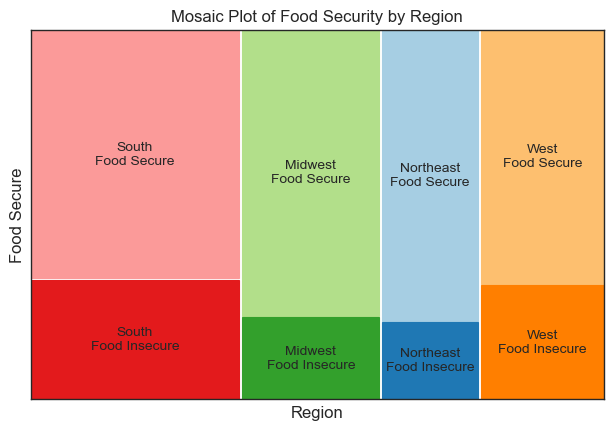

In [14]:
fig, axs = plt.subplots(ncols = 1, figsize = (7.4,4.8))

cols = {('1','0'):paired[0],('1','1'):paired[1],('2','0'):paired[2],('2','1'):paired[3],
            ('3','0'):paired[4],('3','1'):paired[5],('4','0'):paired[6],('4','1'):paired[7]}

labels_SEC = lambda k:{('1','0'):'Northeast\nFood Secure',('1','1'):'Northeast\nFood Insecure',('2','0'):'Midwest\nFood Secure',('2','1'):'Midwest\nFood Insecure',
            ('3','0'):'South\nFood Secure',('3','1'):'South\nFood Insecure',('4','0'):'West\nFood Secure',('4','1'):'West\nFood Insecure'}[k]

mosaic(data=df, index = ['region', 'binadltfscat'], ax = axs, 
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels_SEC, axes_label=False)
axs.set(xlabel = 'Region', ylabel = 'Food Secure', title = 'Mosaic Plot of Food Security by Region')

# Flipping plot
plt.gca(ax = axs).invert_yaxis()

plt.show()

In [34]:
df.groupby('region').mean()['binadltfscat']

region
1    0.210591
2    0.224315
3    0.325267
4    0.311132
Name: binadltfscat, dtype: float64

## RURAL

Figure 9

[Text(0, 0, '3503'), Text(0, 0, '1305')]

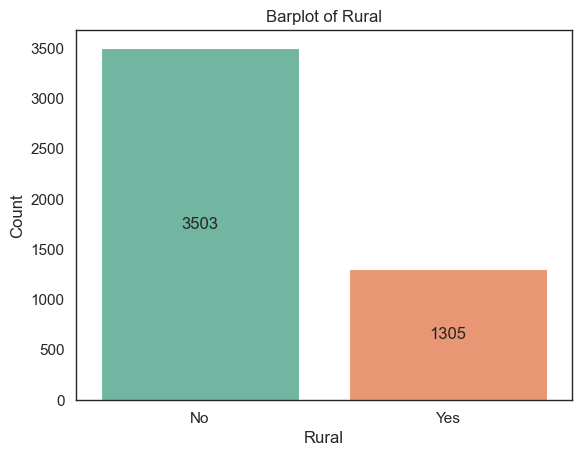

In [15]:
ax = sns.countplot(data = df, x = 'rural')

plt.xlabel('Rural')
plt.ylabel('Count')
plt.title('Barplot of Rural')

plt.setp(ax, xticks = [0,1], xticklabels = ['No','Yes'])
ax.bar_label(ax.containers[0], label_type='center')

Figure 10 and Figure 11 Combined

C:\Users\samuel.thomas\AppData\Local\Temp\ipykernel_6796\3054633506.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt.gca(ax = axs[1]).invert_yaxis()


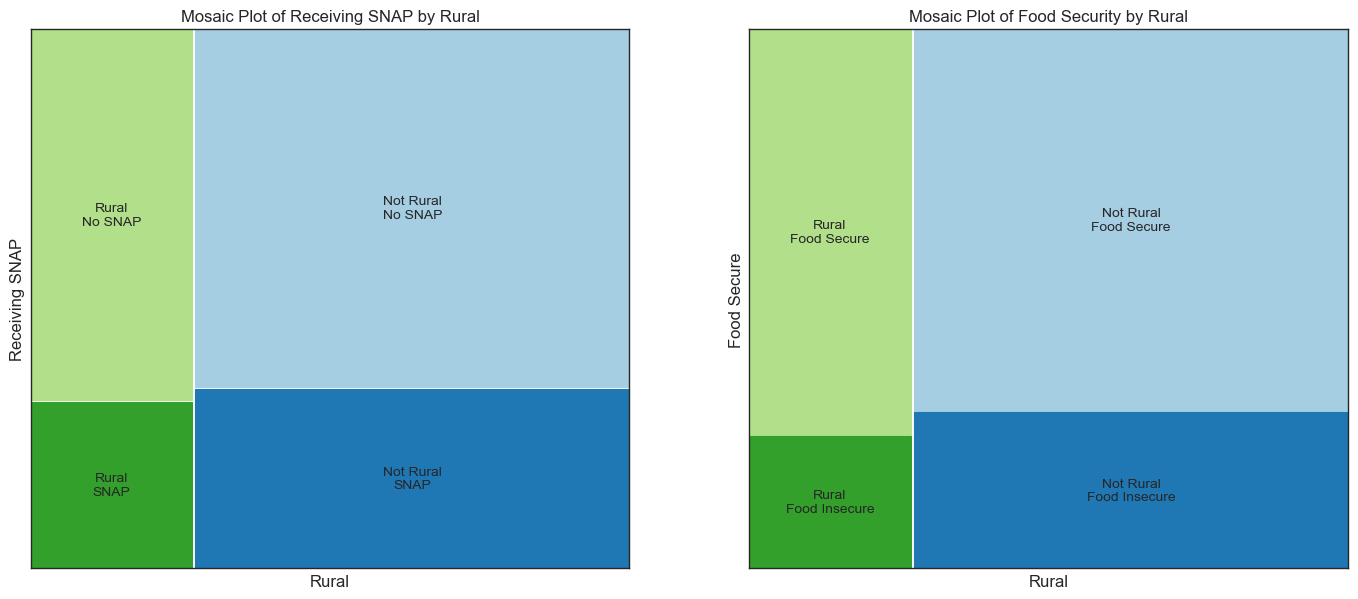

In [13]:
fig, axs = plt.subplots(ncols = 2, figsize = (17,7))

cols = {('0','0'):paired[0],('0','1'):paired[1],('1','0'):paired[2],('1','1'):paired[3]}

labels_SNAP = lambda k:{('0','0'):'Not Rural\nNo SNAP',('0','1'):'Not Rural\nSNAP',('1','0'):'Rural\nNo SNAP',('1','1'):'Rural\nSNAP'}[k]

mosaic(data=df, index=['rural', 'snapnowhh'], ax=axs[0], 
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels_SNAP, axes_label=False)
axs[0].set(xlabel = 'Rural', ylabel = 'Receiving SNAP', title = 'Mosaic Plot of Receiving SNAP by Rural')

labels_SEC = lambda k:{('0','0'):'Not Rural\nFood Secure',('0','1'):'Not Rural\nFood Insecure',('1','0'):'Rural\nFood Secure',('1','1'):'Rural\nFood Insecure'}[k]

mosaic(data=df, index = ['rural', 'binadltfscat'], ax = axs[1], 
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels_SEC, axes_label=False)
axs[1].set(xlabel = 'Rural', ylabel = 'Food Secure', title = 'Mosaic Plot of Food Security by Rural')

plt.gca(ax = axs[1]).invert_yaxis()
plt.show()

Figure 10

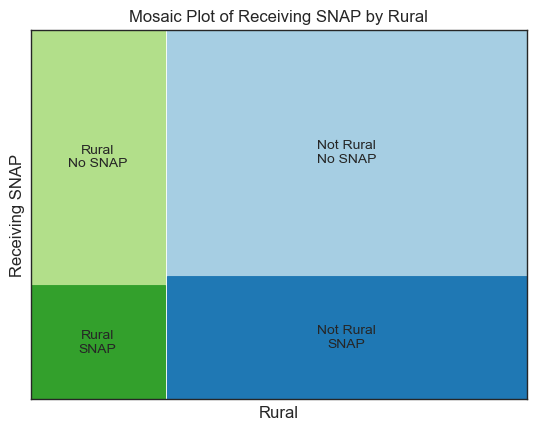

In [35]:
fig, axs = plt.subplots(ncols = 1)

cols = {('0','0'):paired[0],('0','1'):paired[1],('1','0'):paired[2],('1','1'):paired[3]}

labels_SNAP = lambda k:{('0','0'):'Not Rural\nNo SNAP',('0','1'):'Not Rural\nSNAP',('1','0'):'Rural\nNo SNAP',('1','1'):'Rural\nSNAP'}[k]

mosaic(data=df, index=['rural', 'snapnowhh'], ax=axs, 
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels_SNAP, axes_label=False)
axs.set(xlabel = 'Rural', ylabel = 'Receiving SNAP', title = 'Mosaic Plot of Receiving SNAP by Rural')

plt.show()

In [37]:
df.groupby('rural').mean()['snapnowhh']

rural
0    0.334570
1    0.309579
Name: snapnowhh, dtype: float64

Figure 11

C:\Users\samuel.thomas\AppData\Local\Temp\ipykernel_11388\1182421302.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt.gca(ax = axs).invert_yaxis()


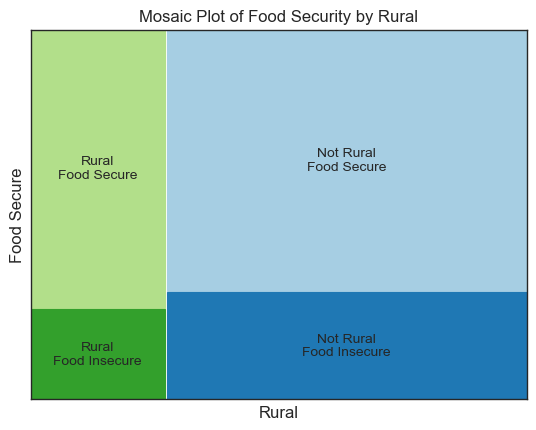

In [16]:
fig, axs = plt.subplots(ncols = 1)

cols = {('0','0'):paired[0],('0','1'):paired[1],('1','0'):paired[2],('1','1'):paired[3]}

labels_SEC = lambda k:{('0','0'):'Not Rural\nFood Secure',('0','1'):'Not Rural\nFood Insecure',('1','0'):'Rural\nFood Secure',('1','1'):'Rural\nFood Insecure'}[k]

mosaic(data=df, index = ['rural', 'binadltfscat'], ax = axs, 
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels_SEC, axes_label=False)
axs.set(xlabel = 'Rural', ylabel = 'Food Secure', title = 'Mosaic Plot of Food Security by Rural')

# Flipping plot
plt.gca(ax = axs).invert_yaxis()

plt.show()

In [17]:
df.groupby('rural').mean()['binadltfscat']

rural
0    0.290323
1    0.245977
Name: binadltfscat, dtype: float64

Figure 12

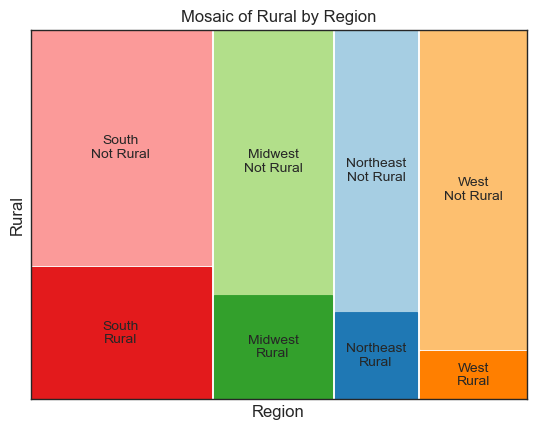

In [18]:
fig, axs = plt.subplots(ncols = 1)

cols = {('1','0'):paired[0],('1','1'):paired[1],('2','0'):paired[2],('2','1'):paired[3],
            ('3','0'):paired[4],('3','1'):paired[5],('4','0'):paired[6],('4','1'):paired[7]}

labels = lambda k:{('1','0'):'Northeast\nNot Rural',('1','1'):'Northeast\nRural',('2','0'):'Midwest\nNot Rural',('2','1'):'Midwest\nRural',
            ('3','0'):'South\nNot Rural',('3','1'):'South\nRural',('4','0'):'West\nNot Rural',('4','1'):'West\nRural'}[k]

mosaic(data=df, index=['region', 'rural'], ax = axs,
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels, axes_label=False)

axs.set(xlabel = 'Region', ylabel = 'Rural', title = 'Mosaic of Rural by Region')

plt.show()

In [19]:
df.groupby('region').mean()['rural']

region
1    0.237685
2    0.284247
3    0.360720
4    0.132255
Name: rural, dtype: float64

## INCHHAVG_R - Monthly Average Income

Figure 13

Text(0.5, 1.0, 'Histogram of Household Income')

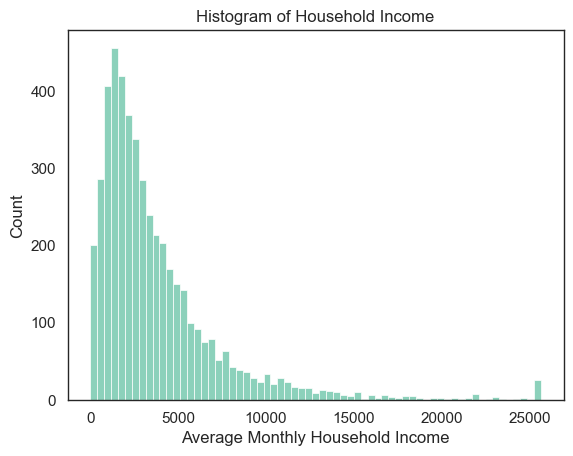

In [21]:
sns.histplot(data = df, x = 'inchhavg_r', fill = True)

plt.xlabel('Average Monthly Household Income')
plt.title('Histogram of Household Income')

In [22]:
df['inchhavg_r'].value_counts() # 98 households with income = 0

0.000000       98
2800.000000    49
2100.000000    43
1400.000000    39
1600.000000    38
               ..
1355.000000     1
5918.262610     1
3646.000000     1
6802.124111     1
2352.000000     1
Name: inchhavg_r, Length: 3015, dtype: int64

In [18]:
df['inchhavg_r'].describe()

count     4808.000000
mean      3761.189224
std       3697.405905
min          0.000000
25%       1440.000000
50%       2660.000000
75%       4795.320000
max      25650.000000
Name: inchhavg_r, dtype: float64

Figure 14, Figure 15, Figure 16 Combined

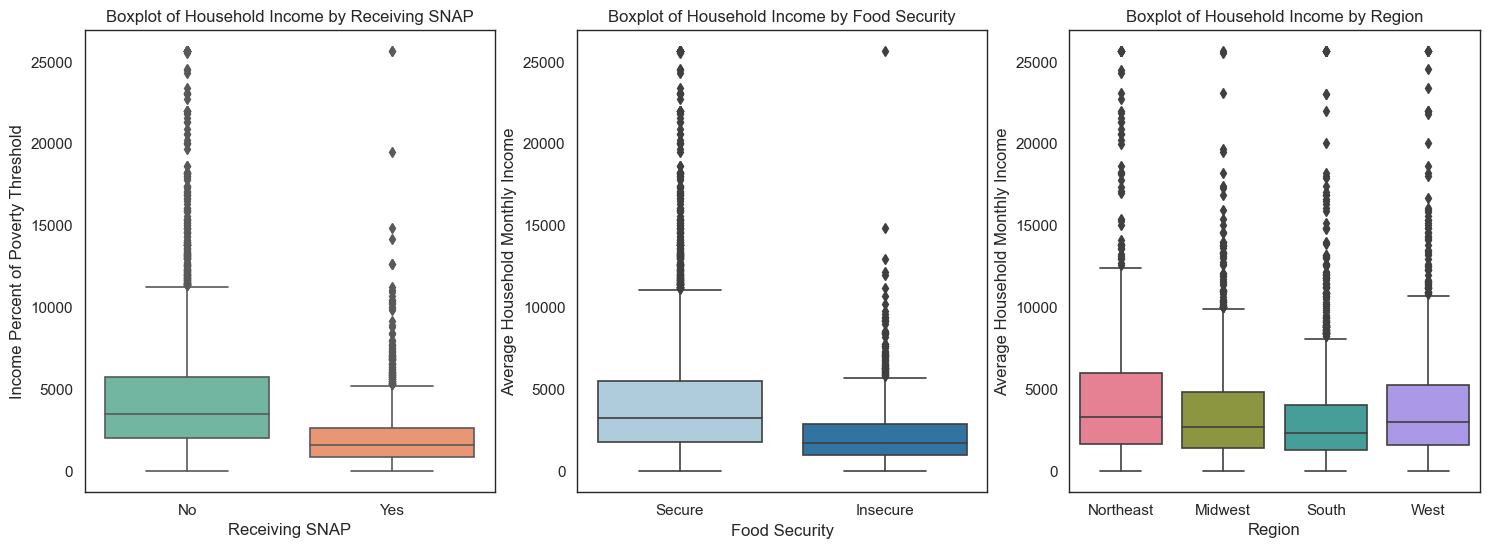

In [23]:
fig, axs = plt.subplots(ncols = 3, figsize = (18,6))

# Creating figures
sns.boxplot(data = df, y = 'inchhavg_r', x = 'snapnowhh', ax=axs[0])
sns.boxplot(data = df, y = 'inchhavg_r', x = 'binadltfscat', palette = 'Paired', ax = axs[1])
sns.boxplot(data = df, y = 'inchhavg_r', x = 'region', palette = 'husl', ax=axs[2])

# Setting labels and titles
axs[0].set(ylabel = 'Income Percent of Poverty Threshold',
            xlabel = 'Receiving SNAP',
            title = 'Boxplot of Household Income by Receiving SNAP')
axs[1].set(ylabel = 'Average Household Monthly Income', 
            xlabel = 'Food Security',
            title = 'Boxplot of Household Income by Food Security')
axs[2].set(ylabel = 'Average Household Monthly Income',
            xlabel = 'Region',
            title = 'Boxplot of Household Income by Region')

# Changing tick labels on x axis
plt.setp(axs[0], xticks = [0,1], xticklabels = ['No','Yes'])
plt.setp(axs[1], xticks = [0,1], xticklabels = ['Secure','Insecure'])
plt.setp(axs[2], xticks = [0,1,2,3], xticklabels = ['Northeast','Midwest','South','West'])

plt.show()

Figure 14

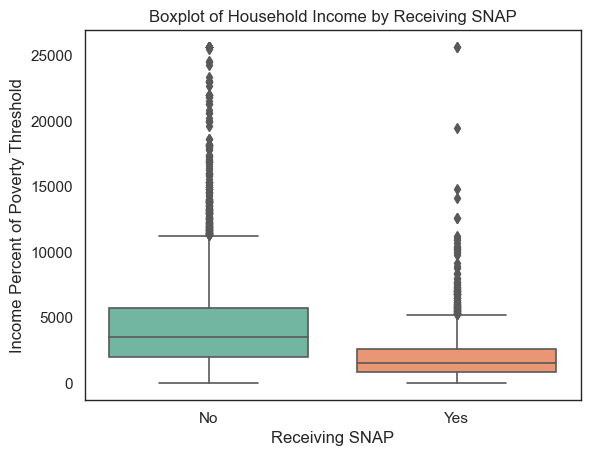

In [24]:
fig, axs = plt.subplots(ncols = 1)
sns.boxplot(data = df, y = 'inchhavg_r', x = 'snapnowhh', ax=axs)

axs.set(ylabel = 'Income Percent of Poverty Threshold',
            xlabel = 'Receiving SNAP',
            title = 'Boxplot of Household Income by Receiving SNAP')

plt.setp(axs, xticks = [0,1], xticklabels = ['No','Yes'])

plt.show()

In [25]:
df.groupby('snapnowhh').median()['inchhavg_r']

snapnowhh
0    3500.00
1    1551.71
Name: inchhavg_r, dtype: float64

In [26]:
df[df['snapnowhh']==0]['inchhavg_r'].describe()

count     3232.000000
mean      4592.464638
std       4026.932051
min          0.000000
25%       2000.000000
50%       3500.000000
75%       5700.415500
max      25650.000000
Name: inchhavg_r, dtype: float64

In [27]:
df[df['snapnowhh']==1]['inchhavg_r'].describe()

count     1576.000000
mean      2056.441673
std       2032.687628
min          0.000000
25%        840.000000
50%       1551.710000
75%       2600.000000
max      25650.000000
Name: inchhavg_r, dtype: float64

Figure 15

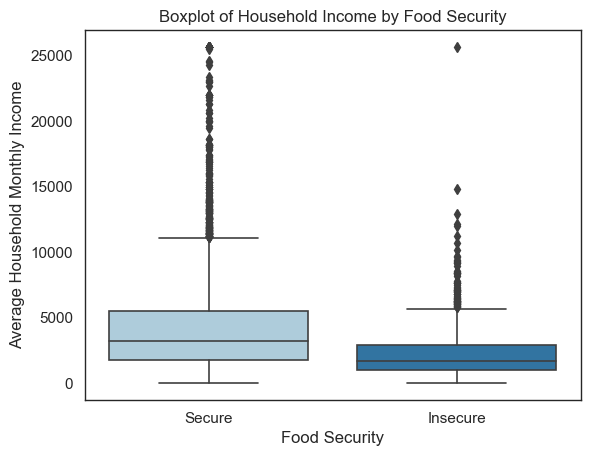

In [28]:
fig, axs = plt.subplots(ncols = 1)
sns.boxplot(data = df, y = 'inchhavg_r', x = 'binadltfscat', palette = 'Paired', ax = axs)

axs.set(ylabel = 'Average Household Monthly Income', 
            xlabel = 'Food Security',
            title = 'Boxplot of Household Income by Food Security')

plt.setp(axs, xticks = [0,1], xticklabels = ['Secure','Insecure'])

plt.show()

In [29]:
df.groupby('binadltfscat').median()['inchhavg_r']

binadltfscat
0    3220.00000
1    1701.48556
Name: inchhavg_r, dtype: float64

In [30]:
df[df['binadltfscat']==0]['inchhavg_r'].describe()

count     3470.000000
mean      4366.642528
std       4027.128684
min          0.000000
25%       1757.903986
50%       3220.000000
75%       5500.000000
max      25650.000000
Name: inchhavg_r, dtype: float64

In [31]:
df[df['binadltfscat']==1]['inchhavg_r'].describe()

count     1338.000000
mean      2190.992686
std       1911.521715
min          0.000000
25%        978.500000
50%       1701.485560
75%       2867.596688
max      25650.000000
Name: inchhavg_r, dtype: float64

Figure 16

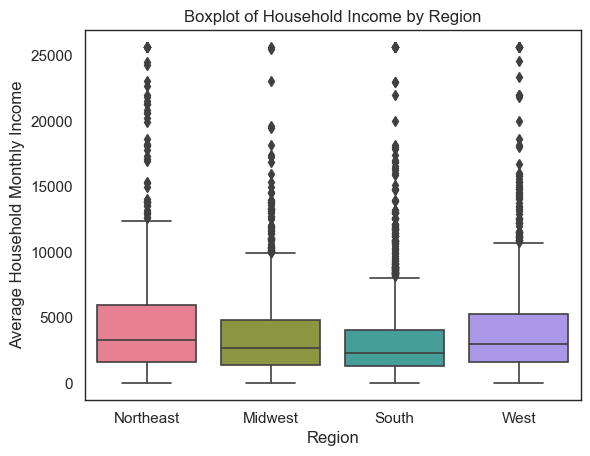

In [32]:
fig, axs = plt.subplots(ncols = 1)
sns.boxplot(data = df, y = 'inchhavg_r', x = 'region', palette = 'husl', ax=axs)

axs.set(ylabel = 'Average Household Monthly Income',
            xlabel = 'Region',
            title = 'Boxplot of Household Income by Region')

plt.setp(axs, xticks = [0,1,2,3], xticklabels = ['Northeast','Midwest','South','West'])

plt.show()

In [33]:
df.groupby('region').describe()['inchhavg_r']

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,812.0,4697.342354,4672.983490,0.0,1643.5025,3289.50,6001.250000,25650.0
2,1168.0,3623.255058,3156.952341,0.0,1400.0000,2688.50,4836.309746,25650.0
3,1777.0,3246.412118,3296.222180,0.0,1300.0000,2323.00,4031.400000,25650.0
4,1051.0,4061.579024,3876.580741,0.0,1600.0000,2965.67,5243.289461,25650.0


## Demographic Data

Contiuous

In [36]:
exo_table = df.describe()[['pr_age_r','ncimmigrant_any','prop_white',
                            'prop_black','prop_other','hispanic',
                            'pr_educcat','nchildren','nadults',
                            'pr_sex','disabled']].iloc[1:3,:].transpose()

exo_table

,mean,std
pr_age_r,46.404742,16.849398
ncimmigrant_any,0.128952,0.335181
prop_white,0.693223,0.446537
prop_black,0.148494,0.348249
prop_other,0.158214,0.346210
hispanic,0.199385,0.385978
pr_educcat,1.635399,0.760729
nchildren,0.891015,1.254813
nadults,1.846506,0.947413
pr_sex,0.735025,0.441366


In [37]:
df['pr_educcat'].value_counts() / df.shape[0]

1    0.538062
2    0.288478
3    0.173461
Name: pr_educcat, dtype: float64

In [39]:
df.groupby('pr_sex').mean()[['snapnowhh','binadltfscat']]

,snapnowhh,binadltfscat
pr_sex,,
0,0.256672,0.262951
1,0.353424,0.283814


## Receiving SNAP vs Eligible for SNAP

Figure 17

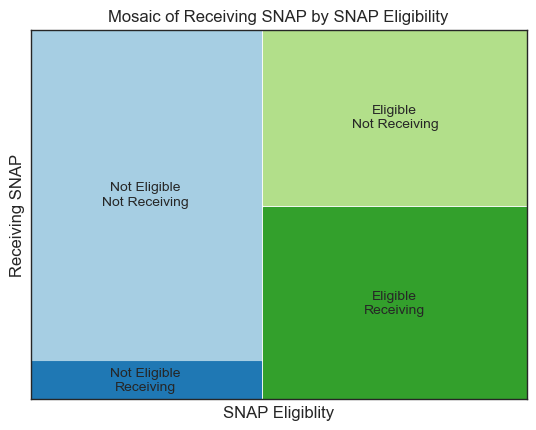

In [30]:
fig, axs = plt.subplots(ncols = 1)

cols = {('0','0'):paired[0],('0','1'):paired[1],('1','0'):paired[2],('1','1'):paired[3]}

labels = lambda k:{('0','0'):'Not Eligible\nNot Receiving',('0','1'):'Not Eligible\nReceiving',('1','0'):'Eligible\nNot Receiving',('1','1'):'Eligible\nReceiving'}[k]

mosaic(data=df, index=['elig_units1', 'snapnowhh'], ax = axs,
        properties = lambda key: {'color' : cols[key]},
        labelizer = labels, axes_label=False)

axs.set(xlabel = 'SNAP Eligiblity', ylabel = 'Receiving SNAP', title = 'Mosaic of Receiving SNAP by SNAP Eligibility')

plt.show()

In [49]:
df.groupby('elig_units1').mean()['snapnowhh']

elig_units1
0    0.104371
1    0.522993
Name: snapnowhh, dtype: float64

In [31]:
df[df['elig_units1'] == 0]['snapnowhh'].value_counts()

0    2008
1     234
Name: snapnowhh, dtype: int64

In [32]:
df[df['elig_units1'] == 1]['snapnowhh'].value_counts()

1    1342
0    1224
Name: snapnowhh, dtype: int64

# RDD Graphs

Log transform of percent poverty

In [40]:
df['log_percent_poverty'] = np.log(df['percent_poverty'] + 1)

Figure 18

Text(0.5, 1.0, 'Density Plot of Log Percent Poverty')

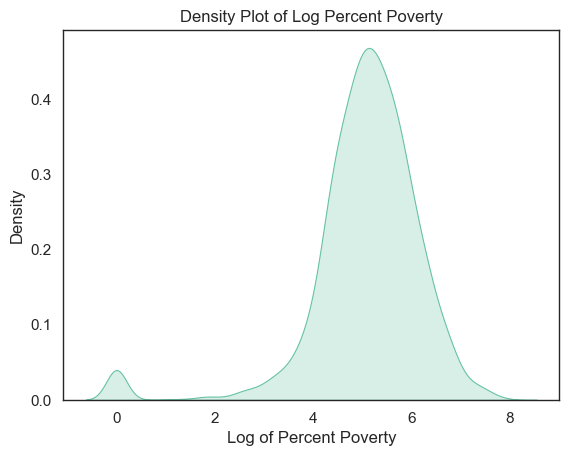

In [41]:
sns.kdeplot(data = df, x = 'log_percent_poverty', fill = True)

plt.xlabel('Log of Percent Poverty')
plt.title('Density Plot of Log Percent Poverty')

In [42]:
df['log_percent_poverty'].median()

5.171819183445004

Figure 19

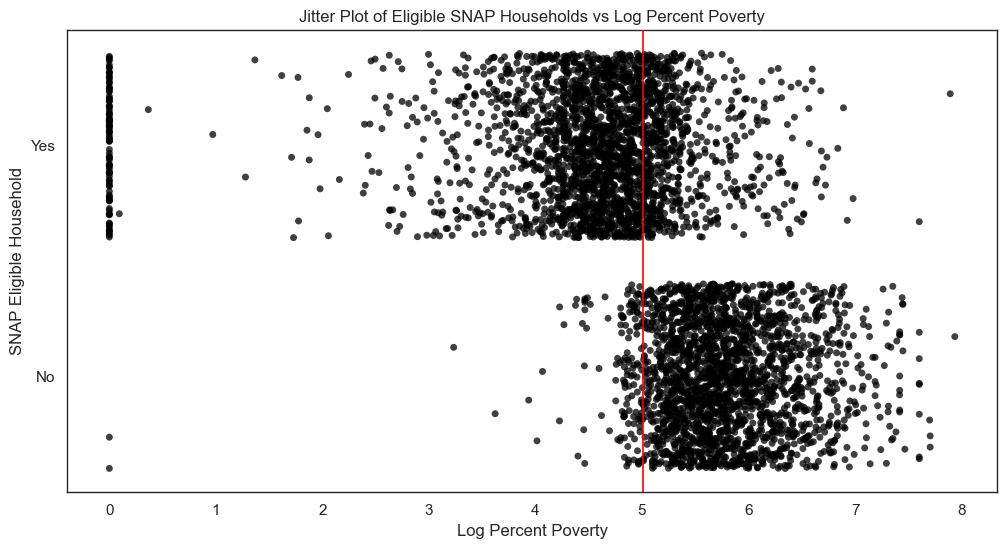

In [43]:
plt.figure(figsize=(12,6))

# Creating plot
ax = sns.stripplot(x = 'log_percent_poverty', y = 'elig_units1', data = df, 
    jitter=0.4, orient = 'h', color = 'black', alpha = 0.75)

# Flipping plot
ax.invert_yaxis()

# Creating red line at cutpoint
plt.axvline(x = np.log(150), color = 'red', zorder = 100)

# Plot labels
plt.title('Jitter Plot of Eligible SNAP Households vs Log Percent Poverty')
plt.xlabel('Log Percent Poverty')
plt.ylabel('SNAP Eligible Household')

# Changing tick values on y axis
plt.setp(ax, yticks = [0,1], yticklabels = ['No','Yes'])

plt.show()

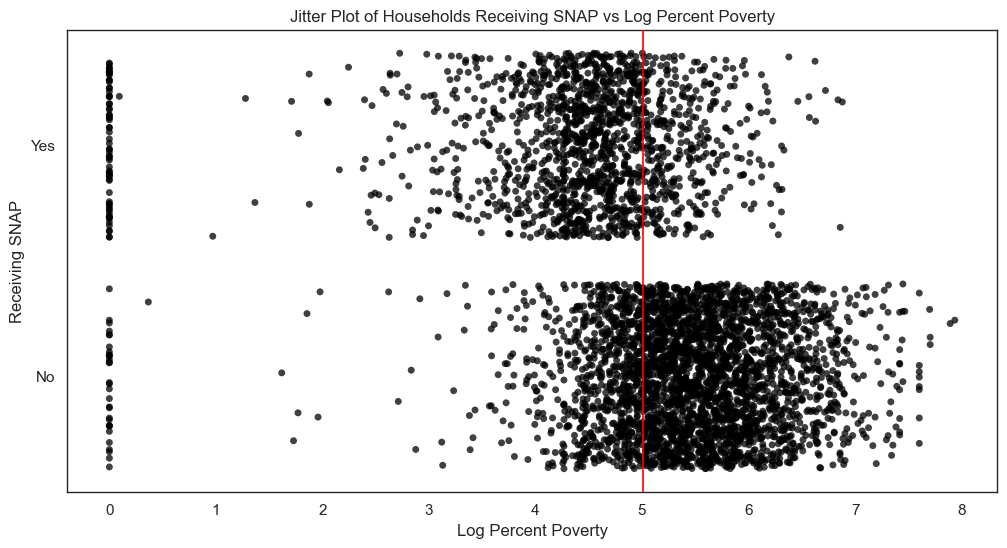

In [44]:
plt.figure(figsize=(12,6))

# Creating plot
ax = sns.stripplot(x = 'log_percent_poverty', y = 'snapnowhh', data = df, 
    jitter=0.4, orient = 'h', color = 'black', alpha = 0.75)

# Flipping plot
ax.invert_yaxis()

# Creating red line at cutpoint
plt.axvline(x = np.log(150), color = 'red', zorder = 100)

# Plot labels
plt.title('Jitter Plot of Households Receiving SNAP vs Log Percent Poverty')
plt.xlabel('Log Percent Poverty')
plt.ylabel('Receiving SNAP')

# Changing tick values on y axis
plt.setp(ax, yticks = [0,1], yticklabels = ['No','Yes'])

plt.show()